### 数据预览统计

In [1]:
import pandas as pd
#读取数据
data = pd.read_csv('E:/datasets/2012年美国总统竞选赞助数据/P00000001-ALL.csv')
data.head()

D:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


<font size=5 color=black>各字段含义 </font>

- cand_nm – 接受捐赠的候选人姓名
- contbr_nm – 捐赠人姓名
- contbr_st – 捐赠人所在州
- contbr_employer – 捐赠人所在公司
- contbr_occupation – 捐赠人职业
- contb_receipt_amt – 捐赠数额（美元）
- contb_receipt_dt – 收到捐款的日期

In [2]:
#查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [3]:
#统计描述
data.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


### 数据处理
####  缺失值处理
处理缺失值前，将空值类型的缺失值确立为可识别的类型
data = data.replace(' ', np.NaN)

In [4]:
data['contbr_employer'].fillna('NOT PROVIDED',inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      1001731 non-null object
contbr_occupation    1001731 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


#### 候选人党派分析

In [4]:
#查看总统候选人
data['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
#各候选人所属党派
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
# 通过map映射函数  增加党派信息列
data['party'] = data['cand_nm'].map(parties)
# 各党派受赞助次数
count_ = data['party'].value_counts()
print(count_)
# 各党派受赞助金额
group1 = data['contb_receipt_amt'].groupby(data['party'])

print(group1.sum())# 各党派受赞助金额
print(group1.size())# 各党派受赞助次数

Democrat      593746
Republican    407985
Name: party, dtype: int64
party
Democrat      1.335026e+08
Republican    1.652488e+08
Name: contb_receipt_amt, dtype: float64
party
Democrat      593746
Republican    407985
Name: contb_receipt_amt, dtype: int64


可以看出，共和党获得赞助金额更多，民主党获得赞助次数更多

#### 各职业赞助情况
DataFrame.sort_values(by, ascending=True, inplace=False)

In [6]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176447.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

职业及雇主信息规范化

In [6]:
#建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}
#雇主对应字典
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# 如果不在字典中,返回x
f1 = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f1)

f2 = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f2)
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED           48176447.00
NOT PROVIDED      28826632.53
ATTORNEY          22008455.49
HOMEMAKER         17484807.65
PHYSICIAN          7224044.40
PRESIDENT          6347843.59
CEO                6004160.31
EXECUTIVE          5273717.90
CONSULTANT         4932627.98
OWNER              3278488.16
INVESTOR           3204481.92
SELF-EMPLOYED      2929716.04
ENGINEER           2730527.43
PROFESSOR          2458033.81
MANAGER            2167571.47
REAL ESTATE        2110499.34
SALES              1814901.82
NOT EMPLOYED       1752927.93
BUSINESS OWNER     1736511.73
TEACHER            1709754.05
Name: contb_receipt_amt, dtype: float64

接受赞助最多的候选人

In [7]:
print('赞助总额：\n')
print(data['contb_receipt_amt'].sum())
print('各党派赞助情况：\n')
print(data['contb_receipt_amt'].groupby(data['party']).sum())
print('各候选人赞助情况：\n')
print(data['contb_receipt_amt'].groupby(data['cand_nm']).sum().sort_values(ascending=False))

赞助总额：

298751395.14000005
各党派赞助情况：

party
Democrat      1.335026e+08
Republican    1.652488e+08
Name: contb_receipt_amt, dtype: float64
各候选人赞助情况：

cand_nm
Obama, Barack                     1.335026e+08
Romney, Mitt                      8.521925e+07
Paul, Ron                         2.072257e+07
Perry, Rick                       1.841151e+07
Gingrich, Newt                    1.201183e+07
Santorum, Rick                    1.072809e+07
Cain, Herman                      7.047265e+06
Pawlenty, Timothy                 4.255054e+06
Huntsman, Jon                     3.204350e+06
Bachmann, Michelle                2.677435e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.674575e+05
McCotter, Thaddeus G              3.703000e+04
Name: contb_receipt_amt, dtype: float64


赞助金额退款的情况

In [8]:
print('赞助退款总额：\n')
print(data[data['contb_receipt_amt']<0]['contb_receipt_amt'].sum())
print('各党派赞助退款情况：\n')
print(data[data['contb_receipt_amt']<0]['contb_receipt_amt'].groupby(data['party']).sum())
print('各候选人赞助退款情况：\n')
print(data[data['contb_receipt_amt']<0]['contb_receipt_amt'].groupby(data['cand_nm']).sum().sort_values(ascending=True))

赞助退款总额：

-10779958.1
各党派赞助退款情况：

party
Democrat     -2374835.79
Republican   -8405122.31
Name: contb_receipt_amt, dtype: float64
各候选人赞助退款情况：

cand_nm
Romney, Mitt                     -3116658.55
Obama, Barack                    -2374835.79
Perry, Rick                      -1894242.09
Pawlenty, Timothy                -1749765.39
Gingrich, Newt                    -820937.70
Santorum, Rick                    -315068.98
Paul, Ron                         -287053.13
Huntsman, Jon                     -126023.00
Cain, Herman                       -53817.00
Bachmann, Michelle                 -34004.11
Roemer, Charles E. 'Buddy' III      -5552.36
McCotter, Thaddeus G                -2000.00
Name: contb_receipt_amt, dtype: float64


由数据可看出最后的竞争聚焦在‘Obama, Barack’，‘Romney, Mitt’两名候选人中，接下来可对两位候选人的支持者做进一步分析

In [10]:

print('支持Obama, Barack的职业分布：\n')
print(data[data['cand_nm']=='Obama, Barack'].groupby(data['contbr_occupation'])['contb_receipt_amt'].sum().sort_values(ascending=False)[:20])


print('支持Romney, Mitt的职业分布：\n')
print(data[data['cand_nm']=='Romney, Mitt']['contb_receipt_amt'].groupby(data['contbr_occupation']).sum().sort_values(ascending=False)[:20])


支持Obama, Barack的职业分布：

contbr_occupation
RETIRED          25270507.23
ATTORNEY         14286324.84
NOT PROVIDED     11527233.18
HOMEMAKER         4243394.30
PHYSICIAN         3732387.44
CONSULTANT        2459812.71
PROFESSOR         2163571.08
CEO               2071474.79
PRESIDENT         1878009.95
NOT EMPLOYED      1708108.20
EXECUTIVE         1355161.05
TEACHER           1250969.15
WRITER            1084088.88
OWNER              998867.36
ENGINEER           950425.55
INVESTOR           884133.00
ARTIST             763125.00
MANAGER            762693.22
SELF-EMPLOYED      736746.40
STUDENT            627449.75
Name: contb_receipt_amt, dtype: float64
contbr_occupation
RETIRED          25270507.23
ATTORNEY         14286324.84
NOT PROVIDED     11527233.18
HOMEMAKER         4243394.30
PHYSICIAN         3732387.44
CONSULTANT        2459812.71
PROFESSOR         2163571.08
CEO               2071474.79
PRESIDENT         1878009.95
NOT EMPLOYED      1708108.20
EXECUTIVE         1355161.05
TE

### 聚合和分组
#### 透视表

In [18]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]#sum(1)是对第二列求和
print(type(over_2mm))
over_2mm

<class 'pandas.core.frame.DataFrame'>


party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14286324.84,7.722131e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INVESTOR,884133.00,2.320349e+06
MANAGER,762693.22,1.404878e+06
NOT PROVIDED,11527233.18,1.729940e+07


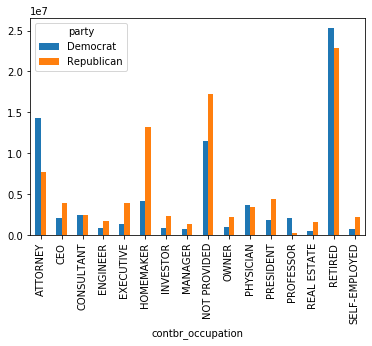

In [17]:
# import matplotlib
over_2mm.plot(kind='bar')


#### 分组运算

In [19]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(group,key,n=5):
#传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             14286324.84
               NOT PROVIDED         11527233.18
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               CONSULTANT            2459812.71
               PROFESSOR             2163571.08
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         10149806.16
               HOMEMAKER             8037250.86
               ATTORNEY              5310284.02
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

从数据看出，Obama更受律师、医生、咨询顾问等精英群体的欢迎，Romney则更多地得到企业家和企业高管的支持

In [20]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22665902.20
               SELF-EMPLOYED         18584277.16
               NOT PROVIDED          11685409.89
               NOT EMPLOYED           8584118.70
               HOMEMAKER              2599987.04
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   RETIRED               11264701.35
               NOT PROVIDED          10824257.44
               HOMEMAKER              8037000.86
               SELF-EMPLOYED          7265136.53
               STUDENT                 488642.82
               CREDIT SUISSE           265650.00
               MORGAN STANLEY          262266.00
               GOLDMAN SACH & CO.      233250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

支持Obama的人主要来自 微软，西德利奥斯汀律师事务所等企业，Romney的支持者主要来自瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、
<p>H.I.G.资本等企业

#### 数据面元化
赞助金额区间化

In [12]:
import numpy as np
#选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()

#　指定多个区间
bins = np.array([1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
# 每个区间的人数
pd.value_counts(labels)

(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(1, 10]                 43751
(1000000, 10000000]         4
(100000, 1000000]           3
(10000, 100000]             3
Name: contb_receipt_amt, dtype: int64

In [43]:
#候选人支持者的赞助金额区间分布
grouped_bins = data_vs.groupby(['cand_nm',labels])
print(type(grouped_bins))
# Unstack用于从多索引中删除索引级别
grouped_bins.size().unstack(0)


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [41]:
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


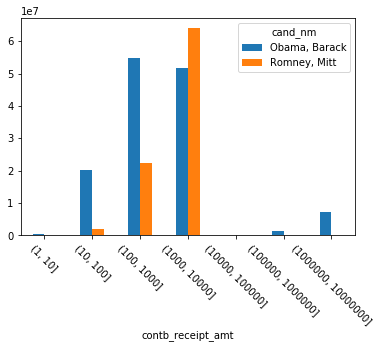

In [46]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar',rot='-45')

In [47]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


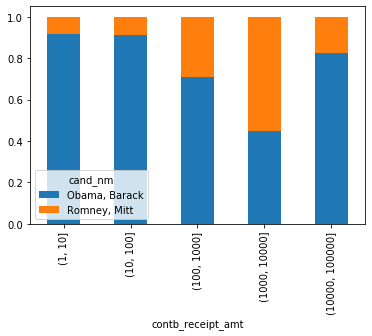

In [48]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

In [49]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
SEBAG, DAVID             267
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
CASPERSON, CAROLINA      167
FALLSGRAFF, TOBY         152
SMITH, ERIK              145
SKINNER, DONNA           136
HARRIS, CLAUDIA W.       134
POTTS, LILLIE            115
ROSBERG, MARILYN         115
DFHDFH, DFHDFH           113
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
RUSH, KYLE                96
SMITH, CHARLES            95
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
KARIMIAN, AFSANEH         88
NURU, ISAAC               87
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64